### **PROJECT TITLE: EXPLORATORY DATA ANALYSIS OF CAR FEATURES**

In this project we are attempting to pre-process our data and also do exploratory data analysis (EDA) on our data. 
We will be acheiving our target in quite a few steps.
Let's get started.

**STEP 1 - Importing the dataset and the necessary libraries, checking datatype, statistical summary,
shape, null values etc.**

1.1 Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns             #matplotlib and seaborn are data visualisation libraries
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,6)  

1.2 Importing our dataset.
First we upload our dataset in Google colab and then we are importing the data set named "data.csv"

In [ ]:
# we are storng our data in a DataFrame named df
df=pd.read_csv('data.csv')
#let us check whether our data was properly imported or not
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


1.3 Checking the shape of our data

In [ ]:
df.shape

(11914, 16)

1.4 Now we take a look at the data types and the statistical summary of our data. Checking data type is very important since we are plotting graphs and we would want all our data for plotting to be integers or floating point numbers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()
# Now that we have looked at the data types and the statistical summary of the data let us move towards step 2.

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**STEP 2 - Finding the columns in our dataset which are of less relevance and then removing them from our dataset.**

Now we generally don't want the data which is of less or no relevance. We would want the exact data which will help us to get results. This is the reason we are removing the columns which are of less relevance. For example,'Market Category','Engine Fuel Type' and 'Number of Doors'.

In [ ]:
#dropping the columns of 'Market Category' and 'Number of Doors' using the .drop method
df=df.drop(['Number of Doors','Engine Fuel Type','Market Category'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


Let us check the size currently for future references and also to make sure that both the columns are completely removed

In [ ]:
df.shape
# We see that now our data has 13 columns because we dropped the 3 columns of less relevance 

(11914, 13)

**STEP 3 - Renaming the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price".**

We would always like the data the way we want. We are renaming the columns so that we get the better view of the data right away. Also it helps anyone who is looking into our dataset or if we are working in a team.

In [ ]:
# Renaming the columns using the .rename() method
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**STEP 4 - Checking for any duplicates in the data, checking for null values and missing data and removing
them.**

4.1 Removing duplicates

When we are working with a very large data set we generally have a lot of duplicates. For example in this dataset itself we have nearly 12000 rows. So finding and removing these duplicate data is a good practice.

In [ ]:
# First we find the number of duplicates using the .duplicated() method
duplicated_rows=df[df.duplicated()]
print("The shape of the duplicated data is : ",duplicated_rows.shape)

The shape of the duplicated data is :  (792, 13)


In [ ]:
# Now we remove this duplicated data using the drop_duplicates()
df=df.drop_duplicates() 
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
# Let us take a look at the shape now noting that earlier we had 11914 rows
df.shape

(11122, 13)

4.2 Removing Null Values: Just like we removed the duplicates in the earlier method, in this method we will be first finding the null values and then deciding whether to remove them or replace them.

In [ ]:
print(df.isnull().sum())
# We note that if we only use isnull() method then we get the boolean for each cell. So we use the sum() to get the total null values in our dataset

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


We see that compared to the size of the dataset the amount of null values we are having is very less. So there is no harm in removing them. But we have to be careful since removal also leads to losing data. Sometimes we can just replace these null values with the mean or any other value of our choice.

In [ ]:
# Dropping the null values with the .dropna() method
df=df.dropna()

In [ ]:
# Checking for the presence of null values again
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


Since there are no more null values present in our dataset. Let us just go forward for our next step.

**STEP 5 - Plotting graphs of various columns to check for outliers and removing those data points from the
dataset.**

Outliers are an important part of our dataset which if not dealt with properly can lead to a lot of variaton in results. An outlier is a point which is far away from the other points of the dataset (either low or high).
We have a number of ways to detect outliers like the Box plot, the Scatter plot,
the Z score and the IQR score respectively.

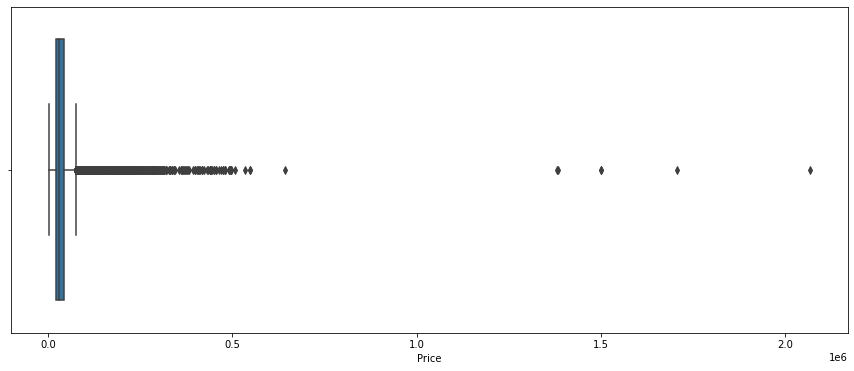

In [ ]:
sns.boxplot(x=df['Price'])

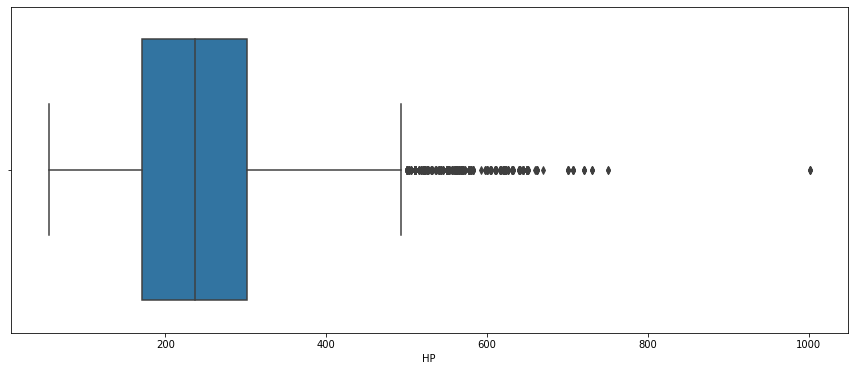

In [ ]:
sns.boxplot(x=df['HP'])

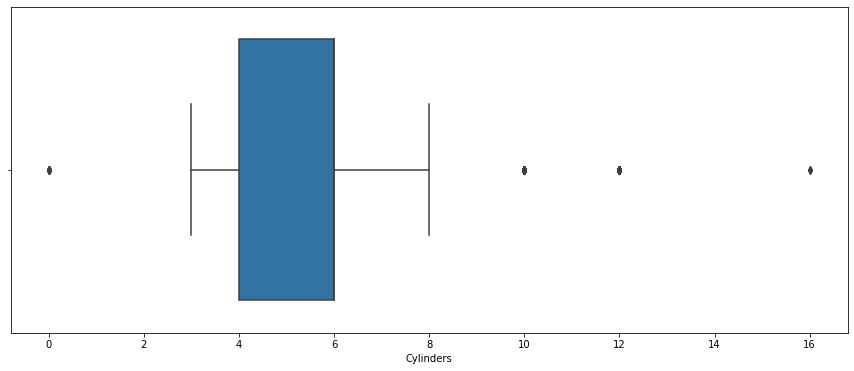

In [ ]:
sns.boxplot(x=df['Cylinders'])

From the three box plots that we have created we see that are quite a few number of outliers and we have to remove them for better results.

Let us use the IQR method to remove our outliers. 

In [ ]:
# First we define the 1st quarter and the 3rd quarter and then calculate the middle 50% of our data using the IQR=Q3-Q1
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [ ]:
# Now that we have got the threshold we should now go forward and remove the outliers from our dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# After the outliers are removed let us check the shape of our dataset
df.shape

(8546, 13)

Now that we have removed the outliers, null values and duplicates we can now plot graphs of our dataset and make several comments on the data.

**STEP 6 - What car brands are the most represented in the dataset and finding the average price among
the top car brands.**

6.1 Finding the most represented car in the dataset

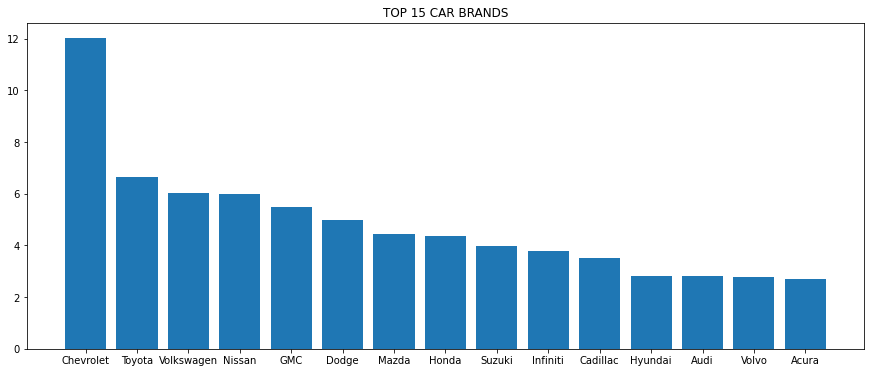

In [ ]:
# Calculating the Percentage for each category and then plotting it.
car_percentages=(df['Make'].value_counts()*100)/sum(df['Make'].value_counts())

# Taking a Look at the top 15 brands
top_15_cars = car_percentages.index[:15]

# Plotting the graphs for getting better clarity for the most represented car in our dataset
plt.figure(figsize=(15,6))
plt.bar(top_15_cars,height=car_percentages[:15])
plt.title("TOP 15 CAR BRANDS")
plt.show()

**It is clear from the above Bar Graph that Chevrolet takes a huge lead above everyone followed by Toyota and Volskswagen**.

6.2 Finding the average price among the top car brands 

In [ ]:
# Since we have plotted the graphs for the top 15 car brands, Let us check the prices for upto the 8th Car Brand
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Honda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


Now that we have the details the average prices of the top brands that we have assumed, we see that average cost of GMC brand is highest touching almost 33300. On the other hand Dodge brand is a little cheaper having average around 26100. 

**STEP 7 - Plotting the correlation matrix and documenting our insights.**

Correlation is the measure of the degree of the linear dependency of a pair of variables. Here we check the correlation to comment on which factors are very closely related to each other.

In [ ]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


1.) It is seen that HP is highly correlated to Cyinders. This means that more the number of cylinders is more powerful the car is.

2.) It is seen that HP and price are highly correlated. This is very obvious that higher the power of the car is higher is going to be the price.

3.) There is a high correlation between MPG-H and MPG-C. This means that the car has nearly same amount of MPG for both city and highway. The amount of miles per Gallon is nearly same for both cases.

4.) High Anticorrelation is seen in between MPG-C and number of cylinders.This means that lower the city MPG is higher the fuel consumption is for the car.

**STEP 8 - Performing EDA and plotting different graphs and documenting our findings (Trying to see how other
variables affect the price of the car)**

Let us plot a Heatmap to get a better view of the data in the form of a graph. 

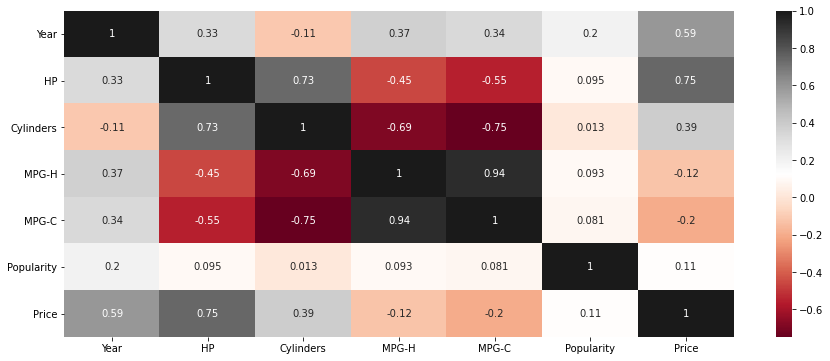

In [ ]:
plt.figure(figsize=(15,6))
heat_m= df.corr()
sns.heatmap(heat_m,cmap="RdGy",annot=True)
# As indicated by the data the blacker the colour is more the correlation,
# white colour represents less or no correlation while red color represents high anticorrelation.

Scatter Plots are often very helpful for visualising the trends across the data. Let us plot a few more graphs to find some more information from our dataset.

8.1 Plotting a scatter plot between the HP and the price of cars. We would like to see the trends in pice with increasing HP for the cars

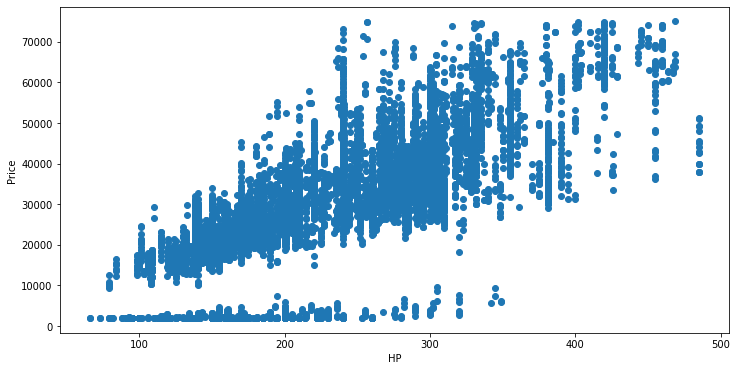

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

The scatter plot clerly shows that with the increase in the HP along the X axis there is pretty much increase in the price.

Also there are less number of cars in the 400 HP to 500 HP region as compared to the other zones.

8.2 Plotting a bar graph to find which style of vehicles were sold the most.

Text(0.5, 0, 'Style')

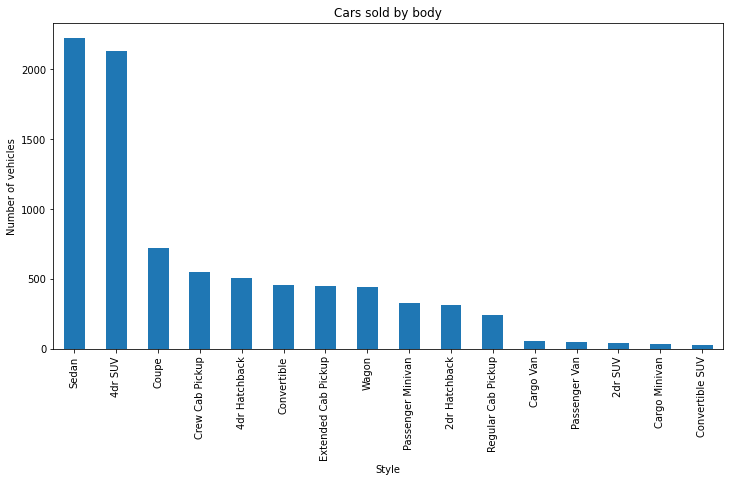

In [ ]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(12,6))                      
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Style')

From the bar graph it is clear that the most sold were sedan cars followed by 4dr SUV's. On the other hand, Convertible SUV's are sold the least.

8.3 Plotting another Bar graph to look at the number of sales over a particular year.

Text(0.5, 0, 'YEAR')

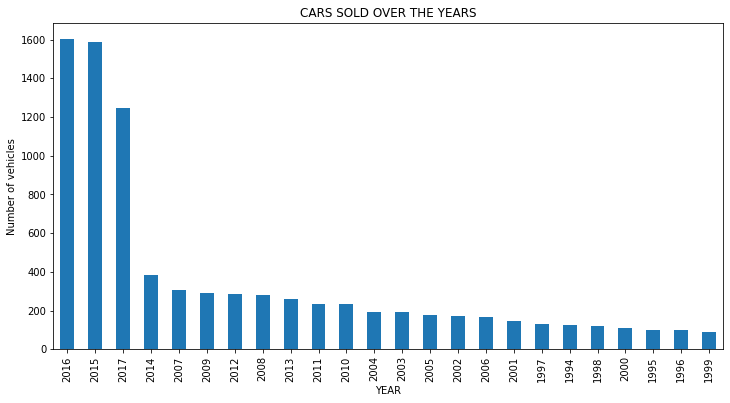

In [ ]:
df['Year'].value_counts().plot.bar(figsize=(12,6))                      
plt.title("CARS SOLD OVER THE YEARS")
plt.ylabel('Number of vehicles')
plt.xlabel('YEAR')

From the graph it is clear that the maximum number of sales were made in the year 2016 and 2015, while in 2017 the sales have decreased a little.

8.4 Let us now draw a graph for analysing the vehicle type and the drive mode type

Text(0.5, 0, 'Number of Vehicles')

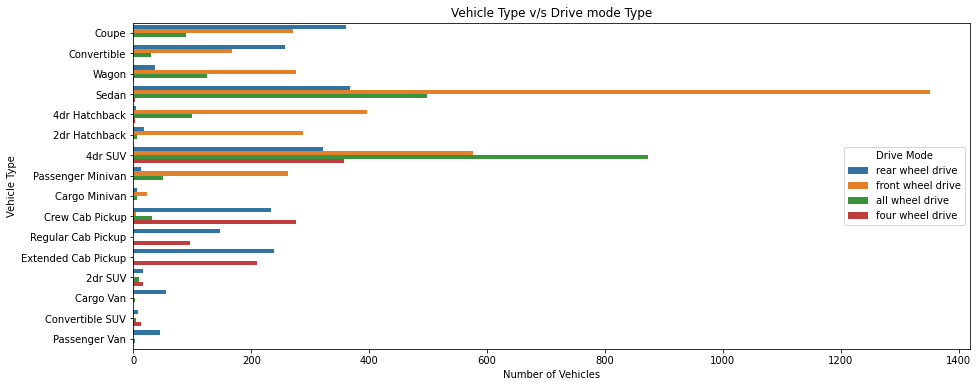

In [ ]:
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Number of Vehicles')

From this graph we see that SEDAN is having a drive mode of front wheel mainly and 4dr-SUV is mainly having all wheel drive type along with the other drive types.

8.5 Now let us group the vehicles on the basis of price ranges for a better view of the available cars in the price ranges. We will see what percentage of cars come under such groups.

In [ ]:
#Creating a new column named 'Price_range' and assigning the value based on car price
df['price_range'] = pd.cut(df['Price'],[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,600000], 
                                labels = ['<10K','10-19K','20-29K','30-39K','40-49K','50-59K','60-69K','70-79K','80-89K','90-99K','>100K'], include_lowest = True)
df['price_range'] = df['price_range'].astype(object)

Now that we have created the price ranges let us go and plot the same for visualising the data that we have.

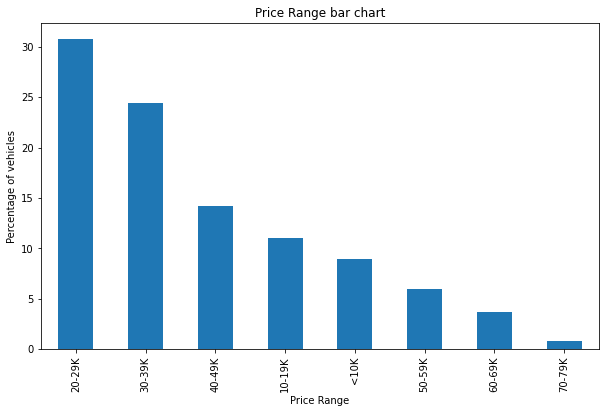

In [ ]:
(df['price_range'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Range bar chart")
plt.ylabel('Percentage of vehicles')
plt.xlabel('Price Range');

From this bar graph it is clear that the highest percentage of vehicles are belonging to the price range of 20-29K while the least number of vehicles are belonging to the 70-79K range.

Now our analysis part is nearly done. Next we are going to build a machine learning model and set price as the target variable.

**STEP 9 - Splitting the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable**

There will be a number of steps in this process. We will first select the training data and set price as the target variable. Next we have to perform feature scaling. We will further split our dataset into train and test set. And finally we will fit multiple linear regression to the training set and predict the Test set results.

9.1 Selecting our training data and target variable

In [ ]:
# Selecting our target variable as Price and then setting it to y.
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

9.2  Performing Fetaure Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
scaled_y = StandardScaler()
X = scaled_X.fit_transform(X)
y = scaled_y.fit_transform(y.reshape(-1,1))

9.3 Now we will split our dataset into the training set and test set respectively

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Test size = 0.2 indidcates that our training set is 80% and test set is 20% 

9.4 Importing Linear Regression and fitting it to our model.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9.5 Predicting the results of the Test set

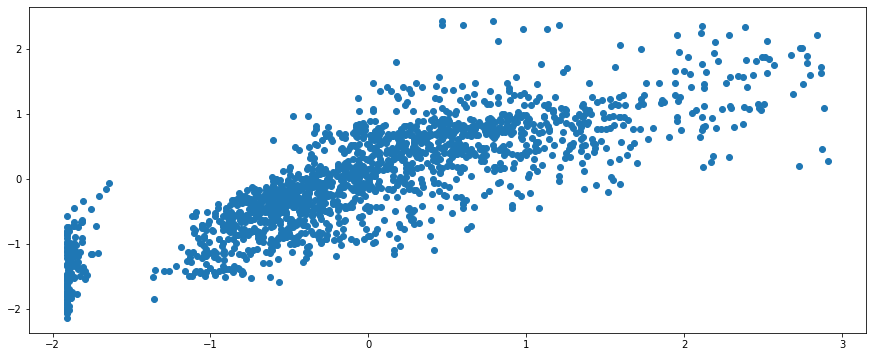

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

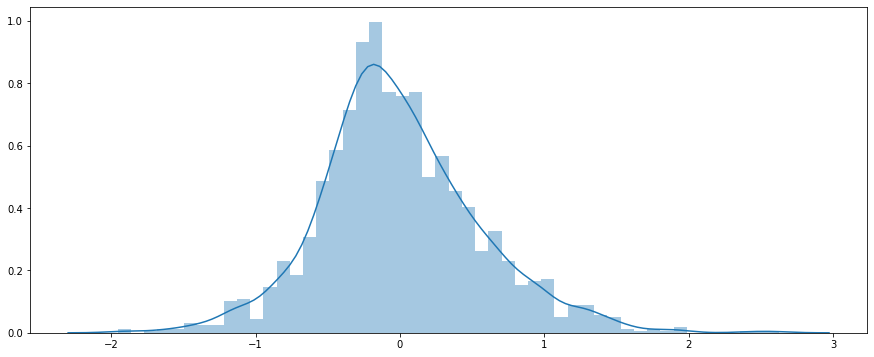

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

9.6 Calculating the Mean Absolute Error, Root Mean Squared Error, R2 Score for the predictions.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


**STEP 10 - Trying different algorithms and checking their performance over metrics like R
square, RMSE, MAE etc and documenting our findings**

10.1 Fitting in Polynomial Regression to our dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_polynm = poly_reg.fit_transform(X_train)
poly_reg.fit(X_polynm, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_polynm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

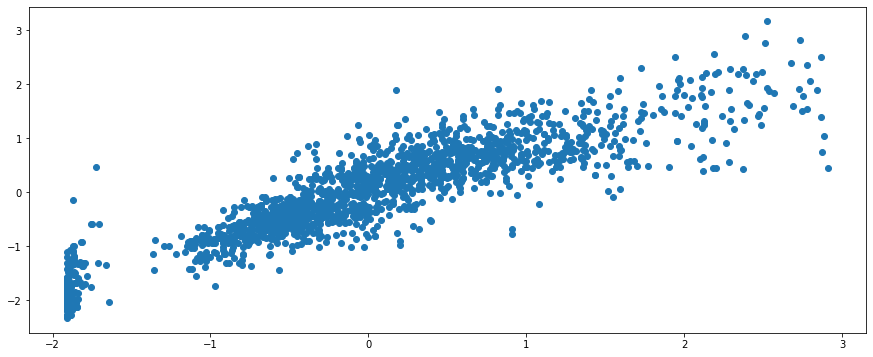

In [ ]:
# Predicting a new result and plotting on a scatter plot 
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

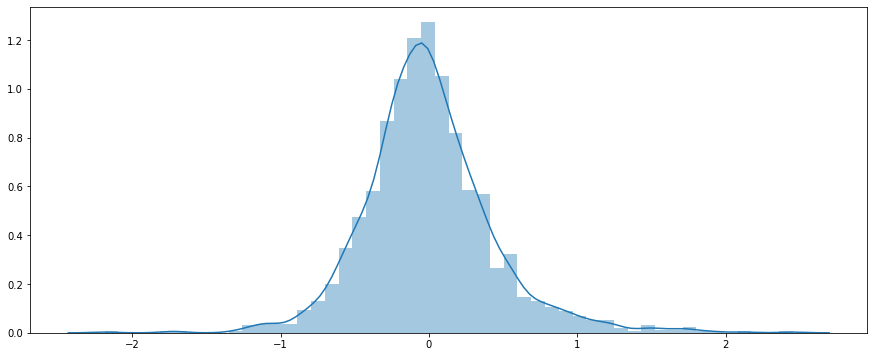

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error for Polynomial regression:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error for Polynomial regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for Polynomial regression:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error for Polynomial regression: 0.31573061752350967
Root Mean Squared Error for Polynomial regression: 0.4351456478672659
R2 Score for Polynomial regression: 0.8053160242314694


The R2 score that we obtained from the Polynomial Linear Regression comes out to be 0.80531. Let us now try with Random Forest Regressor to fit our data and see the performance 

10.2 Fitting in Random Forest Regression to our dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

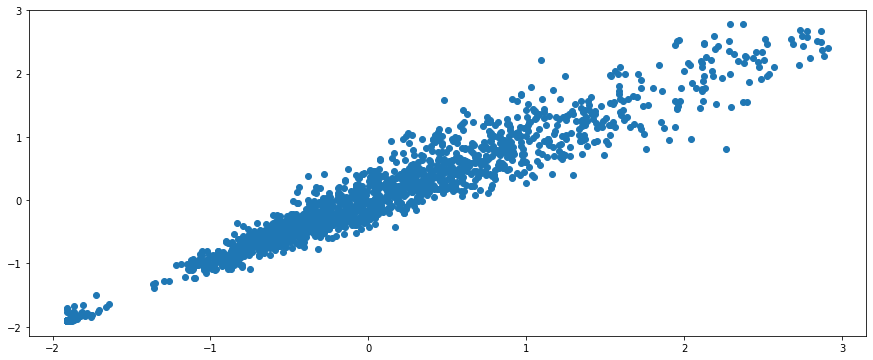

In [ ]:
# Predicitng a new result and plottng a scatter plot 
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

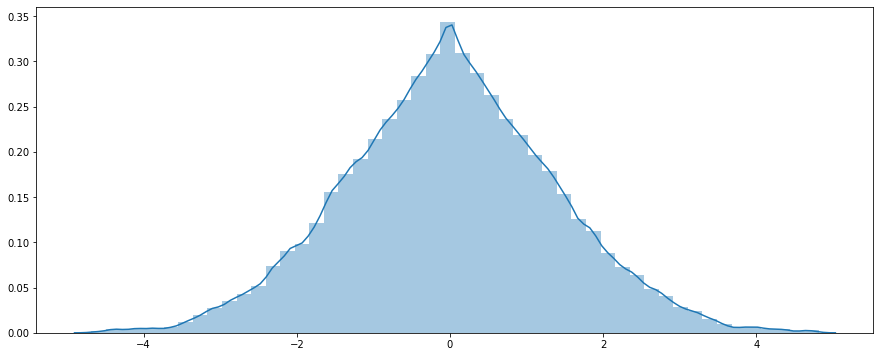

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error for Random Forest Classifier:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error for Random Forest Classifier:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for Random Forest Classifier:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error for Random Forest Classifier: 0.17764364592793377
Root Mean Squared Error for Random Forest Classifier: 0.24726049393080776
R2 Score for Random Forest Classifier: 0.937140578033895


By using the Random Forest Regressor we end up with a R2 score of 0.9371405 for n_estimators(the number of trees that we want to build before taking the predictions) = 400. 

THANK YOU FOR SPENDING YOUR VALUEABLE TIME IN REVIEWING MY PROJECT. I HOPE THAT YOU LIKED IT. PLEASE LET ME KNOW IF I MISSED SOMETHING OR IF I NEED TO IMPROVE ANY PORTION.

THANKING YOU,

SOUMYADEEP SAMANTA

MAIL - soumyadeepsamanta41@gmail.com